# Лабораторная работа №4
# Правильный многоугольник Рело. Векторизация вычислений в numpy

Корзун В. А. Вариант 3 07.04.2024

# 1. Построение треугольника Рёло

Построим представление границы правильного треугольника Рёло в виде матрицы, каждая строка которой содержит координаты точек, описывающих границу.

Полагаем, что заданы координаты центра правильного треугольника Рело center, ширина треугольника Рело r и количество точек для описания одной стороны треугольника Рело N.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
n = 101 # количество вершин треугольника Рело
center = np.array([0,0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания одной стороны треугольника Рело

## 1.1 Вычисление координат вершин правильного треугольника

Вершины правильного многоугольника расположены на окружности, описанной вокруг многоугольника. Радиус окружности R, описанной вокруг правильного $n$-угольника с длиной стороны l, вычисляется по формуле:

$$ R = \frac{l}{2 \sin{\pi / n}} $$

Длина $l$ стороны правильного треугольника, на котором будем строить треугольник
Рело, совпадает с шириной треугольника Рело $r$.

In [12]:
l = r # !!! равенство справедливо только для треугольника Рело

Вычислим радиус описанной окружности $R$:

In [13]:
R = l/(2*np.sin(np.pi/n))

Зафиксируем прямоугольную декартову систему координат. Центр треугольника
размещаем в точке center . Построим матрицу vertices с координатами вершин
правильного треугольника, используя параметрическое описание точек описанной
окружности по формуле $x(t) = x_0 + R \cos t, y(t) = y_0 + R \sin t$ для значений $t \in \{0, 2\pi/3, 4\pi/3\}$

In [14]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
vertices

array([[ 160.77241618,    0.        ],
       [ 160.46141756,    9.99516282],
       [ 159.52962488,   19.9516563 ],
       [ 157.98064308,   29.8309607 ],
       [ 155.82046486,   39.59485491],
       [ 153.05744753,   49.20556431],
       [ 149.70228068,   58.62590694],
       [ 145.76794478,   67.81943733],
       [ 141.26966102,   76.7505875 ],
       [ 136.22483238,   85.38480454],
       [ 130.65297633,   93.68868437],
       [ 124.5756493 ,  101.63010088],
       [ 118.01636329,  109.17833027],
       [ 111.00049489,  116.30416991],
       [ 103.55518714,  122.98005132],
       [  95.70924448,  129.18014679],
       [  87.49302136,  134.88046937],
       [  78.93830473,  140.05896562],
       [  70.07819113,  144.69560094],
       [  60.94695863,  148.77243709],
       [  51.57993419,  152.27370158],
       [  42.013357  ,  155.18584871],
       [  32.28423829,  157.49761193],
       [  22.43021814,  159.20004748],
       [  12.48941983,  160.28656898],
       [   2.50030238,  1

**Обратите внимение:** массив vertices вычислен без использования циклов. Это пример векторизации вычислений в numpy.

Для доступа к элементам матрицы в numpy можно использовать индексацию с двумя индексами

In [15]:
vertices[0,0], vertices[0,:], vertices[:,1]

(160.77241618042123,
 array([160.77241618,   0.        ]),
 array([   0.        ,    9.99516282,   19.9516563 ,   29.8309607 ,
          39.59485491,   49.20556431,   58.62590694,   67.81943733,
          76.7505875 ,   85.38480454,   93.68868437,  101.63010088,
         109.17833027,  116.30416991,  122.98005132,  129.18014679,
         134.88046937,  140.05896562,  144.69560094,  148.77243709,
         152.27370158,  155.18584871,  157.49761193,  159.20004748,
         160.28656898,  160.75297289,  160.59745477,  159.8206163 ,
         158.42546291,  156.41739218,  153.80417295,  150.59591525,
         146.80503121,  142.44618703,  137.53624622,  132.09420439,
         126.14111574,  119.70001163,  112.79581142,  105.45522614,
          97.70665507,   89.58007593,   81.10692888,   72.31999488,
          63.25326887,   53.94182824,   44.42169717,   34.72970718,
          24.90335469,   14.98065597,    5.        ,   -5.        ,
         -14.98065597,  -24.90335469,  -34.72970718,  -44

Построим изображение вершин треугольника:

(-176.76800091056373,
 176.84576937523005,
 -176.82827017740553,
 176.82827017740553)

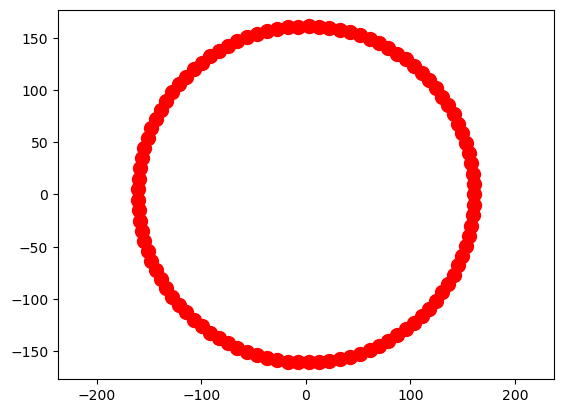

In [16]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal')

## 1.2 Предстваление одной стороны треугольника Рёло

Обозначим через $\alpha$ центральный угол, соответствующий стороне правильног $n$-угольника. Тогда:

$$\alpha = 2\pi/n$$

Обозначим через $\beta$ центральный угол, соответствующий стороне правильного многоугольника Рело, когда центр окружности расположен в вершине правильного многоугольника. Тогда:

$$\beta = \alpha / 2$$

Необходимо построить матрицу с координатами точек, описывающих одну сторону треугольника Рело относительно вершины vertices[0] . Сторона представляет собой дугу окружности радиуса с центром в точке vertices[0] и значением угла $[\pi - \beta / 2, \pi + \beta / 2]$

Вычислим значения введённых величин $\alpha$ и $\beta$:

In [9]:
alpha = 2*np.pi/n
beta = alpha/2

Вычислим массив angle значений угла для построения координат точек стороны треугольника Рело, состоящий из N элементов:

In [10]:
angle = np.linspace(-beta/2, beta/2, N)

Вычислим матрицу side0 с координатами точек первой стороны треугольника Рело,
используя параметрическое описание окружности с центром в точке vertices[0]
радиусом r для значений угла на отрезке $[\pi - \beta / 2, \pi + \beta /2]$.

In [11]:
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi), np.sin(angle + np.pi)])

Построим изображение вершин и стороны треугольника Рело:

(-4.726350454318064, 6.273495698858845, -5.499999999999999, 5.500000000000001)

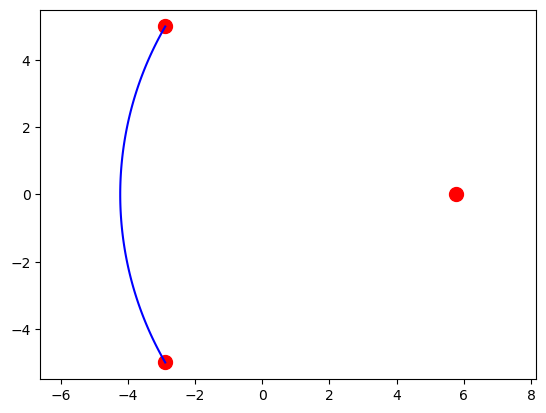

In [15]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');

Вычислим матрицу side1 с координатами точек, описывающих сторону треугольника Рело относительно второй вершины vertices[1] . Сторона представляет собой дугу окружности радиуса с центром в точке vertices[1] и значением угла $[\pi - \beta / 2 + \alpha, \pi + \beta / 2 + \alpha]$


In [13]:
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha),
                                      np.sin(angle + np.pi + alpha)])

Построим изображение вершин и двух сторон треугольника Рело:

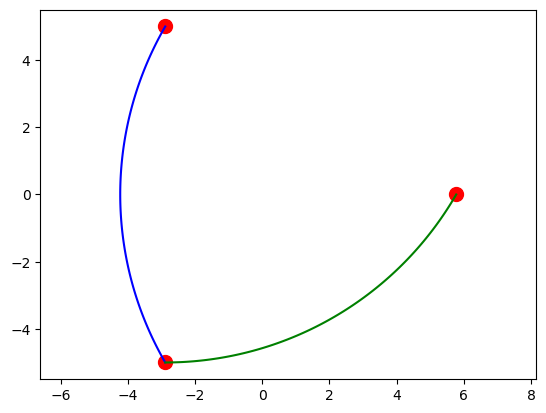

In [16]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');

## 1.3 Моделирование границы треугольника Рёло

Создадим СПИСОК из матриц, каждая их которых содержит координаты точек одной из сторон треугольника Рело:

In [17]:
list_sides = [vertices[i] +
              r*np.transpose([np.cos(angle + np.pi + i*alpha),
                              np.sin(angle + np.pi + i*alpha)])
              for i in range(n)]

С помощью фунции concatenate из расширения numpy объединим массивы, созданные для каждой из сторон треугольника Рело, в единый массив sides:

In [18]:
sides = np.concatenate(list_sides)

Построим изображение вершин и всех сторон треугольника Рело:

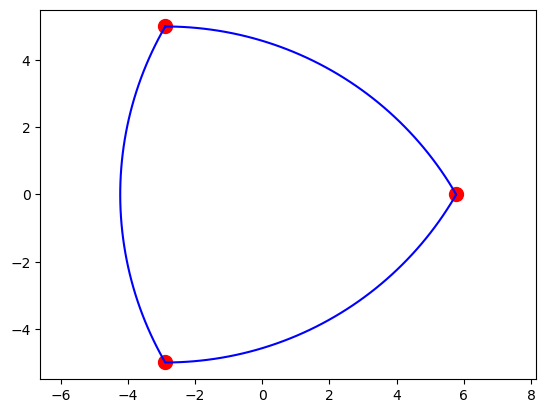

In [22]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)
plt.axis('equal');

# 2 Построение правильного многоугольника Рёло

$\color{Red}{Создание}$ матричного описания границы правильного многоугольника Рёло для произвольных значений переменных n, center, r, N, следуя аналогичным рассуждениям из Задания 4.1 (вычисление координат вершин, представление одной стороны, моделирование всей границы). Помните, что количество вершин многоугольника должно быть нечетным.

Обратите внимание, что длина стороны $l$ правильного многоугольника, на основании которого строится многоугольник Рело, является неизвестной величиной и должна быть выражена через количество вершин $n$ и ширину $r$ многоугольника Рело. $\color{Red}{Напишем}$ подробно, как получена аналитическая зависимость $l$ от $n$ и $r$. Объяснения оформим в тексте документа с лабораторной работой.

## 2.1 Вычисление координат вершин правильного многоугольника

$\alpha$ - центральный угол, $\beta = \alpha / 2$, ширина фигуры есть расстояние от одной вершины к одной из противоположных, по теореме косинусов получим что $l$ выражается через $r$ и $n$:

$$l^2 = 2 r^2 (1 - \cos{\frac{180}{n}})

In [ ]:
alpha = 360 / n
beta = alpha / 2
l = np.sqrt(2 * r**2 * (1 - np.cos(np.pi / n)))

Вершины правильного многоугольника расположены на окружности, описанной вокруг многоугольника. Радиус окружности R, описанной вокруг правильного $n$-угольника с длиной стороны $l$, вычисляется по формуле:

$$ R = \frac{l}{2 \sin{\pi / n}} $$

In [ ]:
R = l / (2 * np.sin(np.pi / n))

Зафиксируем прямоугольную декартову систему координат. Центр треугольника
размещаем в точке center . Построим матрицу vertices с координатами вершин
правильного треугольника, используя параметрическое описание точек описанной
окружности по формуле $x(t) = x_0 + R \cos t, y(t) = y_0 + R \sin t$ для значений $t \in \{0, 2\pi/3, 4\pi/3\}$

In [ ]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
vertices

array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

## 2.2 Моделирование границ многоугольника Рёло

Вычислим массив angle значений угла для построения координат точек стороны треугольника Рело, состоящий из N элементов:

In [ ]:
angle = np.linspace(-beta/2, beta/2, N)

Создадим СПИСОК из матриц, каждая их которых содержит координаты точек одной из сторон треугольника Рело:

In [ ]:
list_sides = [vertices[i] +
              r*np.transpose([np.cos(angle + np.pi + i*alpha),
                              np.sin(angle + np.pi + i*alpha)])
              for i in range(n)]

С помощью фунции concatenate из расширения numpy объединим массивы, созданные для каждой из сторон треугольника Рело, в единый массив sides:

In [ ]:
sides = np.concatenate(list_sides)

# 3 Результирующая пользовательская функция

a) $\color{Red}{Наишем}$ пользовательскую функцию regular_polygon_Relo(n, center, r, N) на основании кода из Задания 4.2. Функция должна возвращать матрицу, каждая строка которой содержит координаты точек, описывающих границу правильного
многоугольника Рело.

Аргументы пользовательской функции:

-  n : количество вершин правильного многоугольника Рело; является нечетным целым числом большим 2; стандартное значение $n = 3$;
- center : массив координат центра правильного многоугольника Рело; стандартное значение $center = np.array([0,0])$;
- r : ширина правильного многоугольника Рело; является положительным числом; стандартное значение $r = 1$;
- N : количество точек для описания одной стороны правильного многоугольника Рело; является натуральным числом;  cтандартное значение $N = 100$.

Код функции не должен использовать переменные из глобальной области видимости модуля. Внутри функции не должно oсуществляться отображение многоугольника Рело.

b) $\color{Red}{Осуществим}$ контроль за значениями аргументов при вызове функции с помощью оператора assert.

c) $\color{Red}{Укажем}$ аннотации типов и $\color{Red}{оформим}$ строки документации. $\color{Red}{Осуществим}$ доступ
к аннотации типов и к строкам документации через атрибуты объекта функции.

d) $\color{Red}{Создадим}$ модуль relo.py, в котором будет содержаться пользовательская
функция regular_polygon_Relo.

In [21]:
def regular_polygon_Relo(n = 3, center = np.array([0,0]), r = 1, N = 100):
    """Функция создающая координаты точек составляющих стороны многоугольника Рёло в зависимости от кол-ва сторон, точки начала, ширины фигуры и кол-ва точек на сторону

    Arguments:

    n: кол-во сторон многоугольника (n - нечётное). По умолчанию 3

    center: массив состоящий из двух чисел показывающих положения точки центра фигуры. По умолчанию np.array([0,0])

    r: ширина многоугольника Рёло. По умолчанию 1

    N: кол-во точек на одну сторону. По умолчанию 100

    Return: матрица. Массив состоящий из массивов двух чисел
    """

    assert n % 2 != 0, 'Кол-во сторон должно быть нечётным'
    assert n > 2, 'Кол-во сторон больше двух'
    assert r > 0, 'Ширина должна быть положительной'
    assert N >= 0, 'Кол-во точек N на сторону неотрицательно'
    
    alpha = 360 / n
    beta = alpha / 2
    l = np.sqrt(2 * r**2 * (1 - np.cos(np.pi / n)))
    R = l / (2 * np.sin(np.pi / n))
    t = np.arange(0,2*np.pi,2*np.pi/n)
    vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
    angle = np.linspace(-beta/2, beta/2, N)
    list_sides = [vertices[i] +
                  r*np.transpose([np.cos(angle + np.pi + i*alpha),
                                  np.sin(angle + np.pi + i*alpha)])
                  for i in range(n)]
    sides = np.concatenate(list_sides)
    
    return sides


## 4 Тестирование функции

a) $\color{Red}{Протестируем}$ функцию regular_polygon_Relo из модуля relo для различных значений аргументов в предположении, что корректность вводимых данных НЕ гарантируется. Предварительно очистите ядро Python.

b) $\color{Red}{Построим}$ в одной системе координат правильные многоугольники Рело для различных значений вершин n , положений центра center , ширины r и количества точек для представления одной стороны N . При этом $\color{Red}{вызовем}$ функцию regular_polygon_Relo с различными способами указания аргументов:

- все аргументы позиционные,
- все аргументы ключевые,
- аргументы позиционные и ключевые,
- все аргументы определяются стандартными значениями.


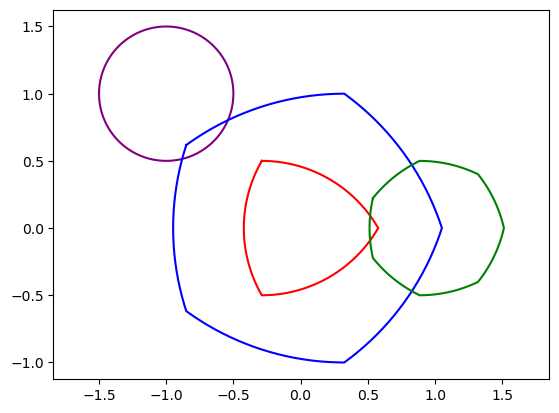

In [9]:
import relo
import numpy as np
import matplotlib.pyplot as plt

sides = relo.regular_polygon_Relo(101, np.array([-1,1]), 1, 100)
plt.plot(sides[:,0],sides[:,1],'-',markersize=10, c = 'purple')
sides = relo.regular_polygon_Relo(n = 5, center = np.array([0,0]), r = 2, N = 100)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=10)
sides = relo.regular_polygon_Relo()
plt.plot(sides[:,0],sides[:,1],'r-',markersize=10)
sides = relo.regular_polygon_Relo(7, np.array([1,0]), N = 100, r = 1)
plt.plot(sides[:,0],sides[:,1],'g-',markersize=10)
plt.axis('equal');